In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import os
import datetime as dt
import numpy as np
import copy 

# Setup

In [64]:
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = [16,9]

# Load data

In [65]:
files = os.listdir("data")
# Sort dates
dates = [dt.datetime.strptime(re.findall(r'\d{4}-\d{2}-\d{2}',f)[0],'%Y-%m-%d') for f in files]
dates = sorted(dates,reverse=False)
dates = [i.strftime('%Y-%m-%d') for i in dates]

In [66]:
dfs = {d: pd.read_csv(f'data/worldometers-{d}.tsv',sep="\t") for d in dates}

# Cleaning
* Replace nan values in numerical attributes with ```0```
* Replace nan values in categorical attributes with ```Other```

In [67]:
for df in dfs.values():
    for i in range(1, df.shape[1] - 1):
        df.iloc[:,i] = df.iloc[:,i].fillna(0)
    df.iloc[:,-1] = df.iloc[:,-1].fillna('Other')

# Analyzing
## Questions
1. How fast the number of cases increase?
2. Does Population affect NewCases?
3. Does Population affect NewDeaths? 
4. Total cases in each continent?


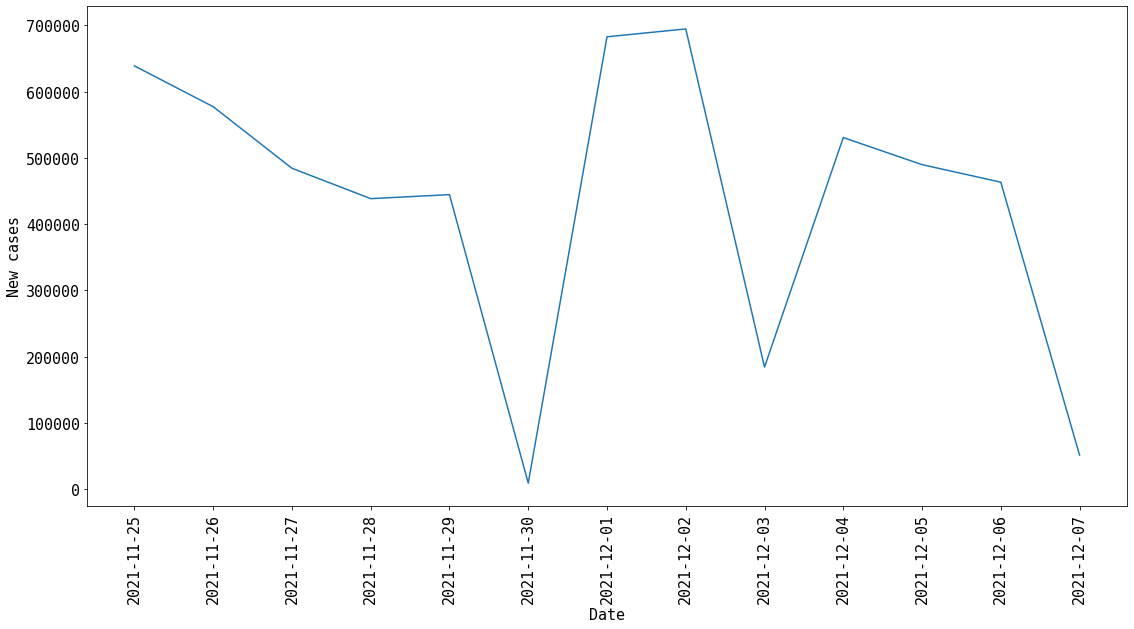

In [68]:
NewCases = [np.sum(dfs[d]["NewCases"]) for d in dates]
plt.xticks(rotation='90')
plt.plot(dates,NewCases)
plt.xlabel("Date")
plt.ylabel("New cases")
plt.tight_layout()
plt.savefig("figures/new_cases.png")

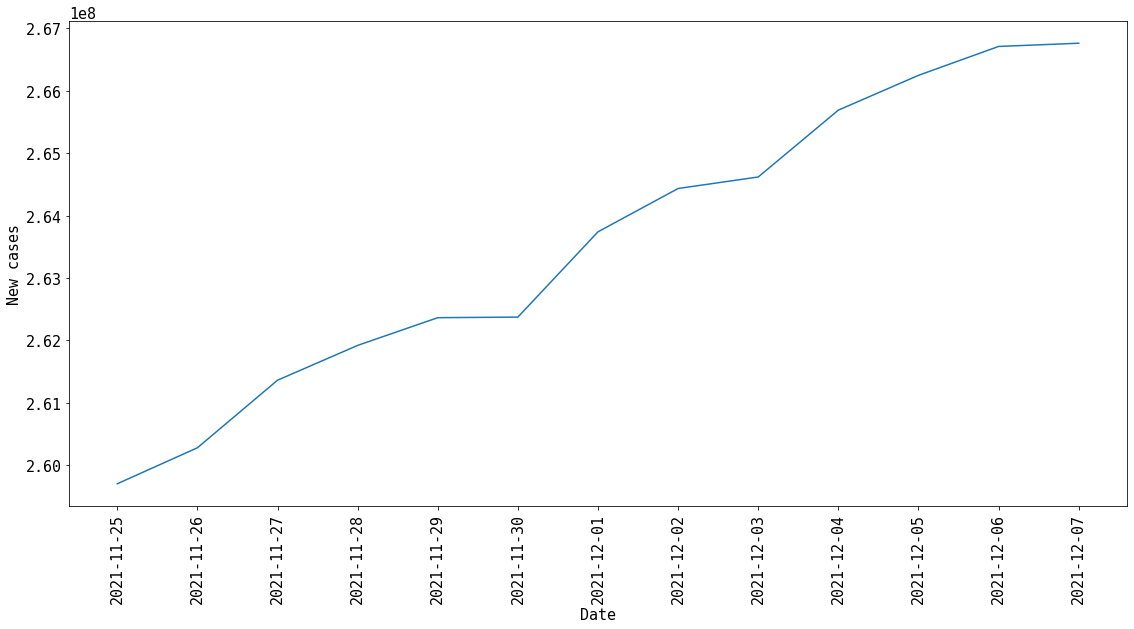

In [69]:
NewDeaths = [np.sum(dfs[d]["TotalCases"]) for d in dates]
plt.xticks(rotation='90')
plt.plot(dates,NewDeaths)
plt.xlabel("Date")
plt.ylabel("New cases")
plt.tight_layout()
plt.savefig("figures/NewDeaths.png")